# CPSC380: 2_numpy_6_sorting

In this notebook, you will learn:
 - Sorting arrays
 - Partitioning
 - Example: k-Nearest Neighbors
 
Read more: 
 - textbook
 - [Numpy website] (https://numpy.org/).

In [2]:
import numpy as np

## 1. ``np.sort`` and ``np.argsort``

In [3]:
x = np.array([2, 1, 4, 3, 5])
print(np.sort(x), x) # orignal x not changed

x.sort() # sort in place
print(x)

[1 2 3 4 5] [2 1 4 3 5]
[1 2 3 4 5]


``argsort``: returns the *indices* of the sorted elements

In [4]:
x = np.array([8, 3, 6, 5, 2, 9, 1, 7, 4])
i = np.argsort(x)
print("index:                          ", np.arange(9))
print("original values:                ", x)
#print("sorted values:                  ", np.sort(x))
print("indices of the sorted elements: ", i)

index:                           [0 1 2 3 4 5 6 7 8]
original values:                 [8 3 6 5 2 9 1 7 4]
indices of the sorted elements:  [6 4 1 8 3 2 7 0 5]


#### Sorting along rows or columns

In [49]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (3, 4))
print(X)

[[6 3 7 4]
 [6 9 2 6]
 [7 4 3 7]]


In [50]:
# sort X along rows
np.sort(X, axis=0)

array([[6, 3, 2, 4],
       [6, 4, 3, 6],
       [7, 9, 7, 7]])

In [51]:
# the indices 
np.argsort(X, axis=0)

array([[0, 0, 1, 0],
       [1, 2, 2, 1],
       [2, 1, 0, 2]], dtype=int64)

In [52]:
# sort X along columns
np.sort(X, axis=1)

array([[3, 4, 6, 7],
       [2, 6, 6, 9],
       [3, 4, 7, 7]])

In [53]:
# indices
np.argsort(X, axis=1)

array([[1, 3, 0, 2],
       [2, 0, 3, 1],
       [2, 1, 0, 3]], dtype=int64)

## 2. Partitioning

``np.partition`` takes an array and a number *K*; 
- the result is a new array with the smallest *K* values to the left of the partition, and 
- the remaining values to the right, in arbitrary order:

In [33]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

In [55]:
X

array([[6, 3, 7, 4],
       [6, 9, 2, 6],
       [7, 4, 3, 7]])

In [59]:
# if axis is not provide, then take the default axis -1, which sorts along the last axis.
np.partition(X, 2)

array([[3, 4, 6, 7],
       [2, 6, 6, 9],
       [3, 4, 7, 7]])

In [57]:
# partitioning along row axis
np.partition(X, 2, axis=0)

array([[6, 3, 2, 4],
       [6, 4, 3, 6],
       [7, 9, 7, 7]])

In [60]:
np.argpartition(X, 2, axis=0)

array([[0, 0, 1, 0],
       [1, 2, 2, 1],
       [2, 1, 0, 2]], dtype=int64)

In [58]:
np.partition(X, 2, axis=1)

array([[3, 4, 6, 7],
       [2, 6, 6, 9],
       [3, 4, 7, 7]])

In [61]:
np.argpartition(X, 2, axis=1)

array([[1, 3, 0, 2],
       [2, 0, 3, 1],
       [2, 1, 0, 3]], dtype=int64)

## 3. Example: k-Nearest Neighbors

In [35]:
nums=np.arange(1,10)

In [36]:
r_nums=nums[:, np.newaxis]
c_nums=nums[np.newaxis, :]
print(r_nums.shape, c_nums.shape)
print(r_nums+c_nums)

(9, 1) (1, 9)
[[ 2  3  4  5  6  7  8  9 10]
 [ 3  4  5  6  7  8  9 10 11]
 [ 4  5  6  7  8  9 10 11 12]
 [ 5  6  7  8  9 10 11 12 13]
 [ 6  7  8  9 10 11 12 13 14]
 [ 7  8  9 10 11 12 13 14 15]
 [ 8  9 10 11 12 13 14 15 16]
 [ 9 10 11 12 13 14 15 16 17]
 [10 11 12 13 14 15 16 17 18]]


In [37]:
r_nums=nums[:, np.newaxis]
c_nums=nums[np.newaxis, :]
print(r_nums.shape, c_nums.shape)
print(r_nums-c_nums)

(9, 1) (1, 9)
[[ 0 -1 -2 -3 -4 -5 -6 -7 -8]
 [ 1  0 -1 -2 -3 -4 -5 -6 -7]
 [ 2  1  0 -1 -2 -3 -4 -5 -6]
 [ 3  2  1  0 -1 -2 -3 -4 -5]
 [ 4  3  2  1  0 -1 -2 -3 -4]
 [ 5  4  3  2  1  0 -1 -2 -3]
 [ 6  5  4  3  2  1  0 -1 -2]
 [ 7  6  5  4  3  2  1  0 -1]
 [ 8  7  6  5  4  3  2  1  0]]


In [38]:
r_nums=nums[:, np.newaxis]
c_nums=nums[np.newaxis, :]
print(r_nums.shape, c_nums.shape)
print(r_nums*c_nums)

(9, 1) (1, 9)
[[ 1  2  3  4  5  6  7  8  9]
 [ 2  4  6  8 10 12 14 16 18]
 [ 3  6  9 12 15 18 21 24 27]
 [ 4  8 12 16 20 24 28 32 36]
 [ 5 10 15 20 25 30 35 40 45]
 [ 6 12 18 24 30 36 42 48 54]
 [ 7 14 21 28 35 42 49 56 63]
 [ 8 16 24 32 40 48 56 64 72]
 [ 9 18 27 36 45 54 63 72 81]]


In [39]:
# randomly generate 10 points (x,y) 0<x1, 0<y<1
X = np.random.rand(10, 2)

print(X[:2])

[[0.08563868 0.50978436]
 [0.69804708 0.18446852]]


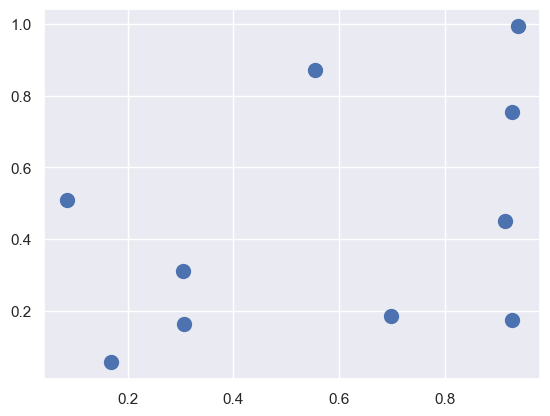

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # Plot styling
plt.scatter(X[:, 0], X[:, 1], s=100);

In [41]:
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)

This operation has a lot packed into it, and it might be a bit confusing if you're unfamiliar with NumPy's broadcasting rules. When you come across code like this, it can be useful to break it down into its component steps:

In [42]:
# for each pair of points, compute differences in their coordinates
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

##print ( X[:, np.newaxis, :])
##print ( X[np.newaxis, :, :])

(10, 10, 2)

In [43]:
# square the coordinate differences
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [44]:
# sum the coordinate differences to get the squared distance
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

Just to double-check what we are doing, we should see that the diagonal of this matrix (i.e., the set of distances between each point and itself) is all zero:

In [45]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

It checks out!
With the pairwise square-distances converted, we can now use ``np.argsort`` to sort along each row. The leftmost columns will then give the indices of the nearest neighbors:

In [46]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 8 7 4 5 1 2 3 9 6]
 [1 9 2 7 8 4 3 0 5 6]
 [2 9 3 1 6 5 8 7 0 4]
 [3 6 2 5 9 1 8 7 0 4]
 [4 7 8 0 1 9 2 5 3 6]
 [5 3 6 2 0 8 1 7 9 4]
 [6 3 5 2 9 1 8 0 7 4]
 [7 8 4 1 0 9 2 5 3 6]
 [8 7 4 0 1 5 2 9 3 6]
 [9 1 2 3 7 8 4 5 6 0]]


Notice that the first column gives the numbers 0 through 9 in order: this is due to the fact that each point's closest neighbor is itself, as we would expect.

By using a full sort here, we've actually done more work than we need to in this case. If we're simply interested in the nearest $k$ neighbors, all we need is to partition each row so that the smallest $k + 1$ squared distances come first, with larger distances filling the remaining positions of the array. We can do this with the ``np.argpartition`` function:

In [47]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

In order to visualize this network of neighbors, let's quickly plot the points along with lines representing the connections from each point to its two nearest neighbors:

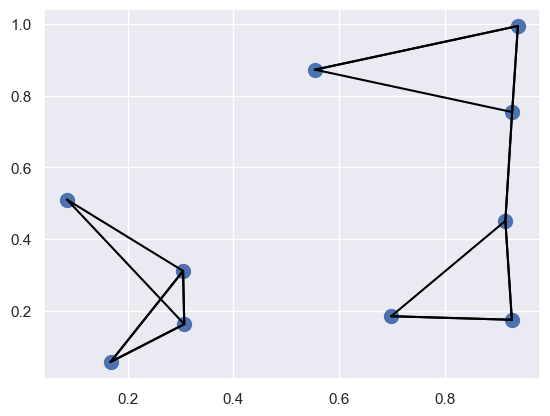

In [48]:
plt.scatter(X[:, 0], X[:, 1], s=100)

# draw lines from each point to its two nearest neighbors
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='black')